In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-health-indicators-dataset/heart_disease_health_indicators_BRFSS2015.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('../input/heart-disease-health-indicators-dataset/heart_disease_health_indicators_BRFSS2015.csv', nrows = 50000)

In [4]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

<AxesSubplot:>

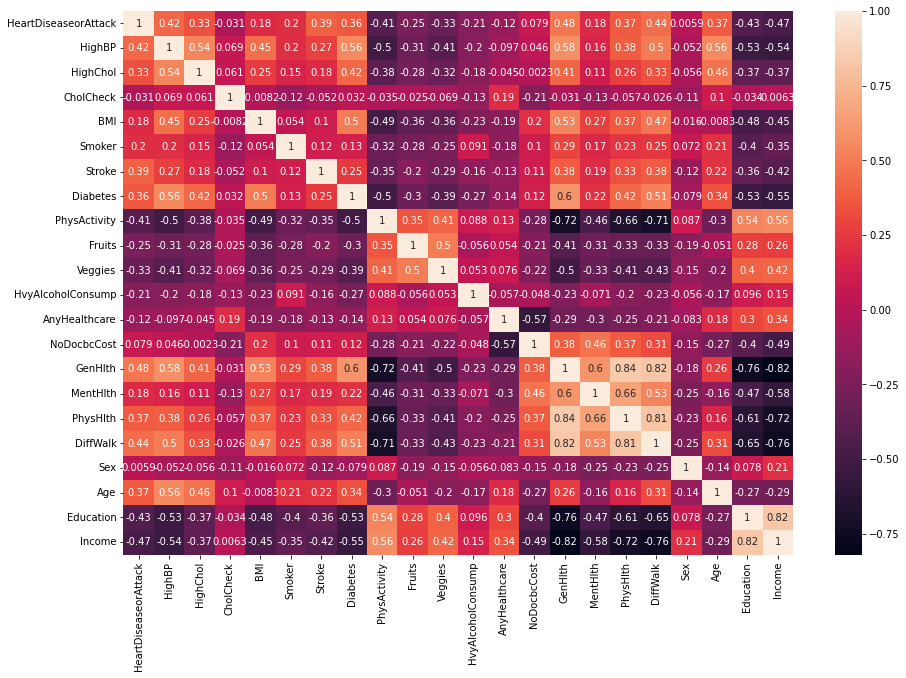

In [5]:
cor_mat = df.corr()
plt.figure(figsize=(15,10))
top_corr_features = cor_mat.index
sns.heatmap(cor_mat[top_corr_features].corr(),annot=True)

In [6]:
#Taking features where correlation <-0.35 or >0.35
X = df[['Income','Education','Age','DiffWalk','PhysHlth','GenHlth','Diabetes','Stroke','HighChol', 'HighBP']]
y = df['HeartDiseaseorAttack']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=17,shuffle=True)

In [7]:
X_train

,Income,Education,Age,DiffWalk,PhysHlth,GenHlth,Diabetes,Stroke,HighChol,HighBP
2380,8.0,6.0,11.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0
3385,8.0,5.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
41779,7.0,5.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
39302,4.0,5.0,7.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0
20619,6.0,6.0,3.0,0.0,15.0,3.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
42297,8.0,5.0,8.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0
33174,6.0,5.0,6.0,0.0,10.0,2.0,0.0,0.0,0.0,1.0
46470,6.0,6.0,8.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0
34959,6.0,5.0,1.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

model = RandomForestClassifier(n_estimators = 1000, random_state = 42)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.967425

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bag = BaggingClassifier(KNeighborsClassifier(),
                            max_samples=0.5, max_features=0.5)
bag.fit(X_train, y_train)
bag.score(X_train, y_train)

0.9102

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
gbc.fit(X_train, y_train)
gbc.score(X_train, y_train)

0.91115

In [11]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100)
abc.fit(X_train, y_train)
abc.score(X_train, y_train)

0.9109

In [12]:
from sklearn.metrics import accuracy_score
y1 = model.predict(X_test)
accuracy_score(y1, y_test)

0.9007

In [13]:
y2 = bag.predict(X_test)
print(accuracy_score(y2, y_test))
y3 = gbc.predict(X_test)
print(accuracy_score(y3, y_test))
y4 = abc.predict(X_test)
print(accuracy_score(y4, y_test))

0.9122
0.9127
0.9126


In [14]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix , classification_report
print(classification_report(y_test,y1))
print(classification_report(y_test,y2))
print(classification_report(y_test,y3))
print(classification_report(y_test,y4))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      9121
         1.0       0.36      0.16      0.22       879

    accuracy                           0.90     10000
   macro avg       0.64      0.57      0.58     10000
weighted avg       0.87      0.90      0.88     10000

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      9121
         1.0       0.54      0.01      0.02       879

    accuracy                           0.91     10000
   macro avg       0.73      0.50      0.48     10000
weighted avg       0.88      0.91      0.87     10000

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      9121
         1.0       0.51      0.12      0.19       879

    accuracy                           0.91     10000
   macro avg       0.72      0.55      0.57     10000
weighted avg       0.89      0.91      0.89     10000

              preci

In [15]:
from joblib import dump, load
dump(abc, 'heart_disease_predictor.joblib') 

['heart_disease_predictor.joblib']